# Evaluando un clasificador

A continuación veremos como evaluar de manera cuantitativa el desempeño de un modelo clasificador.

## Matriz de confusión

Una matriz o tabla de confusión se construye contando los casos que tienen etiqueta real igual a $i$ y etiqueta predicha igual a $j$ para $i \wedge j=1,2,\ldots,C$ donde $C$ es el número de clases.

La siguiente imagen muestra una matriz de confusión para un problema de $10$ clases:

<img src="img/conf-matrix.png" width="400">

En una matriz de confusión: 

- los elementos de la diagonal representan las clasificaciones correctas
- los elementos fuera de la diagonal representan las clasificaciones erroneas
- las filas corresponden a las clases reales
- las columnas corresponden a las clases predichas por el clasificador

**Ejemplo:** En la imagen anterior tenemos $2$ ejemplos de clase "4" que fueron clasificados como clase "1" por el modelo

En `scikit-learn` podemos calcular la matriz de confusión usando el módulo [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics). Como ejemplo utilizaremos nuevamente un clasificador sobre la base de datos de Cancer.

La función `score` del clasificador retorna el valor de una métrica llamada `accuracy` que corresponde a la proporción de casos bien clasificados divido por el total.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

data = load_breast_cancer()
X, y, X_names, y_names = data['data'], data['target'], data['feature_names'], data['target_names']
clf = GaussianNB() 
clf.fit(X, y)
clf.score(X, y)

0.9420035149384886

Veamos ahora la matriz de confusión.

:::{note}

La matriz de confusión requiere una etiqueta categórica, es decir no acepta probabilidades. Podemos convertir probabilidades en etiquetas categóricas usando `np.argmax(probs, axis=1)`. También podemos usar el método `predict` para obtener la predicción categórica directamente.

::::

In [2]:
from sklearn.metrics import confusion_matrix

yhat = clf.predict(X)
cm = confusion_matrix(y,  # Etiqueta real
                      yhat # Etiqueta predicha
                     )
print(cm)

[[189  23]
 [ 10 347]]


También podemos usar el objeto [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay) con sus métodos `from_estimator` o `from_prediction` si deseamos producir una matriz de confusión como una figura de `matplotlib`

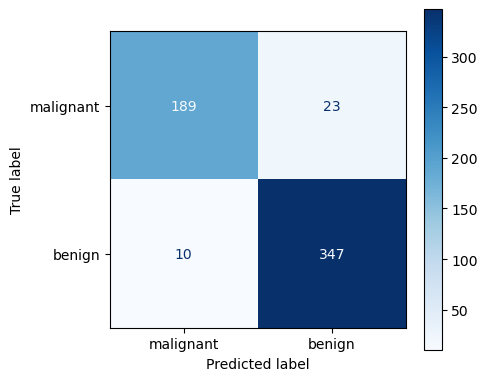

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(5, 4), tight_layout=True)

ConfusionMatrixDisplay.from_estimator(clf, X, y, ax=ax, 
                                      display_labels=y_names, #Nombres de las clases
                                      cmap=plt.cm.Blues, # Escala de colores
                                      normalize=None #Permite escoger entre cantidades y porcentajes
                                     );

Intepretación: 

- Hay 10 casos predichos como maligno que en realidad eran benignos: **Falso positivo**
- Hay 23 casos predichos como benignos que en realidad eran malignos: **Falso negativo**



## Curvas de desempeño

La matriz de confusión y la exactitud son métricas que depende de un umbral de clasificación o punto de operación particular.

En problemas de **clasificación binaria** es mucho más informativo medir el desempeño utilizando curvas Receiver operating characteristic (ROC). Una curva ROC es la tasa de verdaderos positivos

$$
TPR = \frac{TP}{TP+FN}
$$

en función de la tasa de falsos positivos

$$
FPR = \frac{FP}{FP + TN}
$$

para distintos umbrales de clasificación $R$.

Podemos obtenerla de forma simple utilizando `sklearn.metrics.roc_curve`

0.0094, 0.8123, 0.999999998


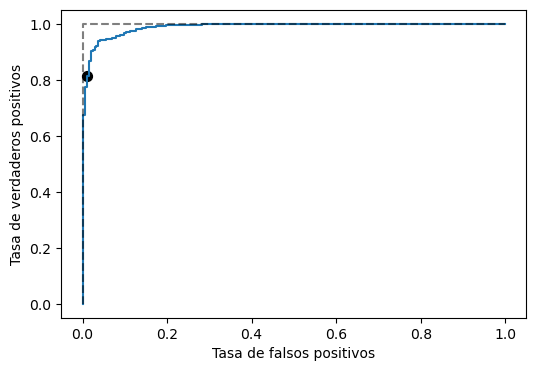

In [4]:
import numpy as np
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X)[:, 1])


fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(fpr, tpr)
ax.plot([0, 0, 1], [0, 1, 1], 'k--', alpha=0.5)
ax.set_xlabel('Tasa de falsos positivos')
ax.set_ylabel('Tasa de verdaderos positivos');

idx = np.where(fpr < 0.01)[0][-1]
print(f"{fpr[idx]:0.4f}, {tpr[idx]:0.4f}, {thresholds[idx]:0.9f}")
ax.scatter(fpr[idx], tpr[idx], s=50, c='k');

El modelo es mejor mientras más apegada esté la curva azul al punto TPR=1 y FPR=0 (línea punteada negra).

La curva ROC nos permite estudiar todos los puntos de operación a la vez y seleccionar aquel que sea más adecuado para la tarea particular.

De la curva anterior podemos extraer que si el FPR máximo tolerable fuese $1$% se alcanzaría una TPR de $81.23$%. Además dicho punto de operación corresponde al umbral $0.999999998$

## Capacidad de generalización

> ¿Cómo podemos saber si el modelo funcionará correctamente en nuevos datos?

La anterior es una pregunta fundamental en aprendizaje de máquinas. Lo que se requiere es poder evaluar la capacidad de generalización del modelo, lo cual es un desafío importante en modelos más complejos.

:::{seealso}

Puedes leer sobre estos temas en el siguiente aquí: https://phuijse.github.io/MachineLearningBook/contents/supervised_learning/validation.html

:::